<a href="https://colab.research.google.com/github/antoniogss/WBGAPI/blob/main/wb_co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook imports and packages

In [ ]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt

#Google Drive connection

In [ ]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )
gc.output.clear()

#Creating directories

In [ ]:
%cd ./gdrive/MyDrive/CTS/

/content/gdrive/MyDrive/CTS


In [ ]:
%mkdir -p "./seminario_1/graficos/"

In [ ]:
%cd ./seminario_1/graficos/

/content/gdrive/MyDrive/CTS/seminario_1/graficos


#WBGAPI

WBGAPI provides modern, pythonic access to the World Bank's data API. It is designed both for data novices and data scientist types.

source: https://pypi.org/project/wbgapi/

In [ ]:
!pip install wbgapi
gc.output.clear()

import wbgapi as wb

#Indexes

In [ ]:
# wb.series.info(q='CO2')
# wb.series.info(q='GDP')
# wb.series.info(q='forest')

In [ ]:
"""	
0 - CO2 emissions (kt)
1 - GDP per capita (current US$)
2 - Forest area (sq. km)
"""
index = ['EN.ATM.CO2E.KT','NY.GDP.PCAP.CD','AG.LND.FRST.K2'] #Series

#Time

In [ ]:
# wb.time.info()

In [ ]:
start = 1992
stop = 2022
step = 1
time = list(range(start,stop,step))
# print('years:',time)
#Ctrl+F10: run after

#Brazil

In [ ]:
wb.economy.info(q='Brazil')

id,value,region,incomeLevel
BRA,Brazil,LCN,UMC
,1 elements,,


In [ ]:
bra_co2 = wb.data.DataFrame(index[0],
                        'BRA',
                        time
                        )

"""
reset the index and convert 
the index to a column
"""
bra_co2.reset_index(inplace=True)

#Transpose 
bra_co2 = bra_co2.T

bra_co2.rename(columns=bra_co2.iloc[0], inplace = True)
bra_co2.drop(bra_co2.index[0], inplace = True)
bra_co2.reset_index(inplace=True)
bra_co2 = bra_co2.rename(columns = {'index':'Year'})

bra_co2.rename(columns={'BRA':'Brazil'},
               inplace = True
              )

bra_co2.replace({'YR' : ' '}, regex = True, inplace = True)
bra_co2['Brazil'] = bra_co2['Brazil'] .astype(float)
bra_co2['Year'] = bra_co2['Year'].astype(int)

bra_co2.head()

,Year,Brazil
0,1992,207870.0
1,1993,215260.0
2,1994,222500.0
3,1995,241280.0
4,1996,262410.0


#Economic Blocs

1.   European Union = EU
2.   Mercado Comum do Sul = MERCOSUL
3.   North American Free Trade Agreement - NAFTA
4.   Asia-Pacific Economic Cooperation - APEC
5.   BRICS








In [ ]:
# wb.region.info()
# wb.economy.info(q='South Africa')

In [ ]:
EU = 'EUU'
# wb.region.members(EU)

In [ ]:
MERCOSUL = ['BRA','URY','ARG','PRY','VEN']
NAFTA = ['CAN','USA','MEX']
APEC = ['AUS','BRN','CAN','CHL','CHN','HKG','IDN', 
        'JPN','KOR','MYS','MEX','NZL','PNG','PER',
        'PHL','RUS','SGP','THA','USA','VNM']
BRICS = ['BRA','RUS','IND','CHN','ZAF']

In [ ]:
eu_co2 = wb.data.DataFrame(index[0],
                       wb.region.members(EU),
                       time,
                       labels=True
                       )

nafta_co2 = wb.data.DataFrame(index[0],
                          NAFTA,
                          time,
                          labels=True
                          )

mercosul_co2 = wb.data.DataFrame(index[0],
                             MERCOSUL,
                             time,
                             labels=True
                             )

apec_co2 = wb.data.DataFrame(index[0],
                         APEC,
                         time,
                         labels=True
                         )

brics_co2 = wb.data.DataFrame(index[0],
                          BRICS,
                          time,
                          labels=True
                          )

dfs = [eu_co2,nafta_co2,mercosul_co2,apec_co2,brics_co2]

for df in dfs:
    df.reset_index(drop=True, inplace=True)
    
eu_co2 = eu_co2.T
nafta_co2 = nafta_co2.T
mercosul_co2 = mercosul_co2.T
apec_co2 = apec_co2.T
brics_co2 = brics_co2.T

eu_co2.rename(columns=eu_co2.iloc[0], inplace = True)
eu_co2.drop(eu_co2.index[0], inplace = True)
eu_co2.reset_index(inplace=True)
eu_co2 = eu_co2.rename(columns = {'index':'Year'})
eu_co2 = eu_co2.replace({'YR' : ' '}, regex = True)

nafta_co2.rename(columns=nafta_co2.iloc[0], inplace = True)
nafta_co2.drop(nafta_co2.index[0], inplace = True)
nafta_co2.reset_index(inplace=True)
nafta_co2 = nafta_co2.rename(columns = {'index':'Year'})
nafta_co2 = nafta_co2.replace({'YR' : ' '}, regex = True)

mercosul_co2.rename(columns=mercosul_co2.iloc[0], inplace = True)
mercosul_co2.drop(mercosul_co2.index[0], inplace = True)
mercosul_co2.reset_index(inplace=True)
mercosul_co2 = mercosul_co2.rename(columns = {'index':'Year'})
mercosul_co2 = mercosul_co2.replace({'YR' : ' '}, regex = True)

apec_co2.rename(columns=apec_co2.iloc[0], inplace = True)
apec_co2.drop(apec_co2.index[0], inplace = True)
apec_co2.reset_index(inplace=True)
apec_co2 = apec_co2.rename(columns = {'index':'Year'})
apec_co2 = apec_co2 .replace({'YR' : ' '}, regex = True)

brics_co2.rename(columns=brics_co2.iloc[0], inplace = True)
brics_co2.drop(brics_co2.index[0], inplace = True)
brics_co2.reset_index(inplace=True)
brics_co2 = brics_co2.rename(columns = {'index':'Year'})
brics_co2 = brics_co2.replace({'YR' : ' '}, regex = True)

#Converting string to float or integer

In [ ]:
x_eu = ['Croatia', 'Italy', 'Estonia', 'Sweden', 'Denmark', 'Greece',
      'Slovak Republic', 'Luxembourg', 'Hungary', 'Netherlands', 'Bulgaria',
      'Malta', 'Czech Republic', 'Latvia', 'Poland', 'Lithuania', 'Belgium',
      'Ireland', 'France', 'Romania', 'Spain', 'Finland', 'Germany', 'Cyprus',
      'Slovenia', 'Portugal', 'Austria']

eu_co2[x_eu] = eu_co2[x_eu].apply(pd.to_numeric, axis = 1)
eu_co2['Year'] = eu_co2['Year'].astype(int)
# eu_co2.dtypes

In [ ]:
x_nafta = ['Mexico', 'United States', 'Canada']

nafta_co2[x_nafta] = nafta_co2[x_nafta].apply(pd.to_numeric, axis = 1)
nafta_co2['Year'] = nafta_co2['Year'].astype(int)
# nafta_co2.dtypes

In [ ]:
x_mercosul = ['Venezuela, RB', 'Paraguay', 'Argentina', 'Uruguay', 'Brazil']

mercosul_co2[x_mercosul] = mercosul_co2[x_mercosul].apply(pd.to_numeric, axis = 1)
mercosul_co2['Year'] = mercosul_co2['Year'].astype(int)
# mercosul_co2.dtypes

In [ ]:
x_apec = ['Vietnam', 'United States', 'Thailand', 'Singapore',
       'Russian Federation', 'Philippines', 'Peru', 'Papua New Guinea',
       'New Zealand', 'Mexico', 'Malaysia', 'Korea, Rep.', 'Japan',
       'Indonesia', 'Hong Kong SAR, China', 'China', 'Chile', 'Canada',
       'Brunei Darussalam', 'Australia']

apec_co2[x_apec] = apec_co2[x_apec].apply(pd.to_numeric, axis = 1)
apec_co2['Year'] = apec_co2['Year'].astype(int)
# apec_co2.dtypes

In [ ]:
x_brics = ['South Africa', 'China', 'India', 'Russian Federation',
       'Brazil']

brics_co2[x_brics] = brics_co2[x_brics].apply(pd.to_numeric, axis = 1)
brics_co2['Year'] = brics_co2['Year'].astype(int)
# brics_co2.dtypes

In [ ]:
brics_co2.head()

,Year,South Africa,China,India,Russian Federation,Brazil
0,1992,238820.0,2418180.0,626290.0,2030810.0,207870.0
1,1993,246490.0,2645410.0,651350.0,1880250.0,215260.0
2,1994,252140.0,2767670.0,685900.0,1685050.0,222500.0
3,1995,264310.0,3088620.0,737860.0,1635490.0,241280.0
4,1996,274110.0,3070510.0,774070.0,1601180.0,262410.0


#Graphs

In [ ]:
# print(plt.style.available)

In [ ]:
plt.style.use('seaborn-whitegrid')

##Brazil

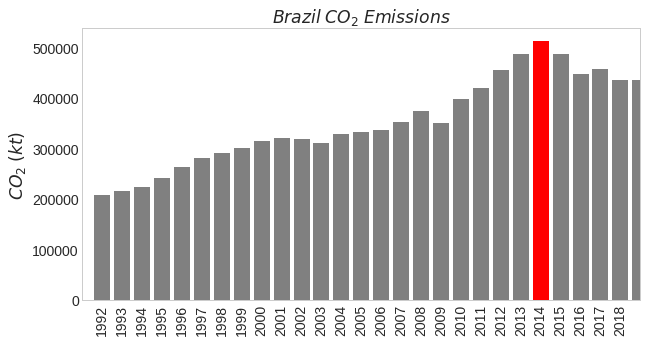

In [ ]:
#Bar Chart
x = bra_co2['Year']
y = bra_co2['Brazil']
plt.figure(figsize=(10,5))
colors = ['r' if (bar == max(bra_co2['Brazil'])) 
              else 'grey' for bar in bra_co2['Brazil']]
plt.bar(x,y,color=colors)
plt.xlim(start-1,stop-3)
plt.ylim(0,None)
plt.xticks(range(start, stop-3),
           fontsize=14,
           rotation=90
           )
plt.yticks(fontsize=14)
# plt.xlabel("Year")
plt.ylabel('$CO_{2}\;(kt)$',
           fontsize='xx-large')
plt.title("$Brazil\;CO_{2}\; Emissions$",
          fontsize='xx-large')
plt.ticklabel_format(style='plain') 
plt.grid(False)  
plt.savefig('brazil_co2.png',
            dpi = 500
          )
plt.show()

##EU

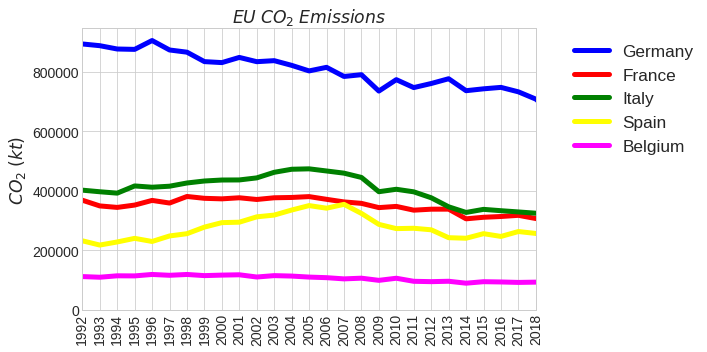

In [ ]:
#Multi-Line Chart
x = eu_co2['Year']
y1 = eu_co2['Germany']
y2 = eu_co2['France']
y3 = eu_co2['Italy']
y4 = eu_co2['Spain']
y5 = eu_co2['Belgium']
plt.figure(figsize=(10,5))
plt.plot(x,y1,color='blue',label='Germany',linewidth=5)
plt.plot(x,y2,color='red',label='France',linewidth=5)
plt.plot(x,y3,color='green',label='Italy',linewidth=5)
plt.plot(x,y4,color='yellow',label='Spain',linewidth=5)
plt.plot(x,y5,color='magenta',label='Belgium',linewidth=5)
plt.xlim(start,stop-4)
plt.ylim(0,None)
plt.xticks(range(start, stop-3),
           fontsize=14,
           rotation=90
           )
plt.yticks(fontsize=14)
# plt.xlabel("Year")
plt.ylabel('$CO_{2}\;(kt)$',
           fontsize='xx-large'
           )
plt.title("$EU\;CO_{2}\; Emissions$",
          fontsize='xx-large'
          )
plt.legend(bbox_to_anchor=(1.05,1), 
           loc='upper left', 
           fontsize='xx-large',
          )
plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.savefig('eu_co2.png', dpi = 500, #dpi = dots per inch
            bbox_to_anchor=(1.05,1), 
            loc='upper left', 
            bbox_inches='tight'
          ) 
plt.tight_layout() #tight margins
plt.show()

##Mercosul

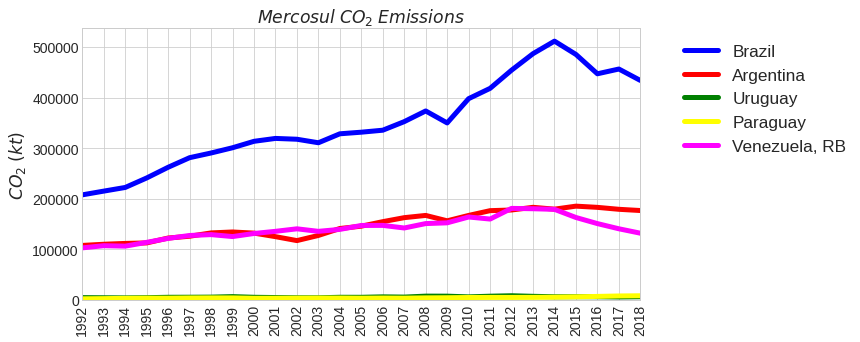

In [ ]:
#Multi-Line Chart
x = mercosul_co2['Year']
y1 = mercosul_co2['Brazil']
y2 = mercosul_co2['Argentina']
y3 = mercosul_co2['Uruguay']
y4 = mercosul_co2['Paraguay']
y5 = mercosul_co2['Venezuela, RB']
plt.figure(figsize=(10,5))
plt.plot(x,y1,color='blue',label='Brazil',linewidth=5)
plt.plot(x,y2,color='red',label='Argentina',linewidth=5)
plt.plot(x,y3,color='green',label='Uruguay',linewidth=5)
plt.plot(x,y4,color='yellow',label='Paraguay',linewidth=5)
plt.plot(x,y5,color='magenta',label='Venezuela, RB',linewidth=5)
plt.xlim(start,stop-4)
plt.ylim(0,None)
plt.xticks(range(start, stop-3),
           fontsize=14,
           rotation=90
           )
plt.yticks(fontsize=14)
# plt.xlabel("Year")
plt.ylabel('$CO_{2}\;(kt)$',
           fontsize='xx-large'
           )
plt.title("$Mercosul\;CO_{2}\; Emissions$",
          fontsize='xx-large'
          )
plt.legend(bbox_to_anchor=(1.05,1),
           loc='upper left',
           fontsize='xx-large'
           )
plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.savefig('mercosul_co2.png', dpi = 500, #dpi = dots per inch
            bbox_to_anchor=(1.05,1), 
            loc='upper left', 
            bbox_inches='tight'
          ) 
plt.show()

##NAFTA

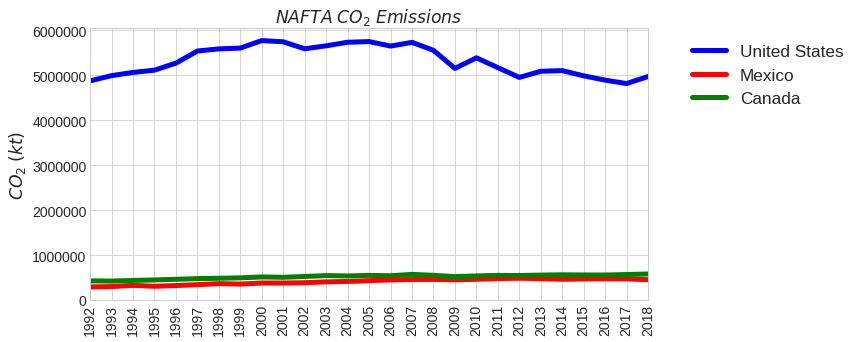

In [ ]:
#Multi-Line Chart
x = nafta_co2['Year']
y1 = nafta_co2['United States']
y2 = nafta_co2['Mexico']
y3 = nafta_co2['Canada']
plt.figure(figsize=(10,5))
plt.plot(x,y1,color='blue',label='United States',linewidth=5)
plt.plot(x,y2,color='red',label='Mexico',linewidth=5)
plt.plot(x,y3,color='green',label='Canada',linewidth=5)
plt.xlim(start,stop-4)
plt.ylim(0,None)
plt.xticks(range(start, stop-3),
           fontsize=14,
           rotation=90
           )
plt.yticks(fontsize=14)
# plt.xlabel("Year")
plt.ylabel('$CO_{2}\;(kt)$',
           fontsize='xx-large'
           )
plt.title("$NAFTA\;CO_{2}\; Emissions$",
          fontsize='xx-large'
          )
plt.legend(bbox_to_anchor=(1.05,1),
           loc='upper left',
           fontsize='xx-large'
           )
plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.savefig('nafta_co2.png', dpi = 200, #dpi = dots per inch
            bbox_to_anchor=(1.05,1), 
            loc='upper left', 
            bbox_inches='tight'
          ) 
plt.show()

##APEC

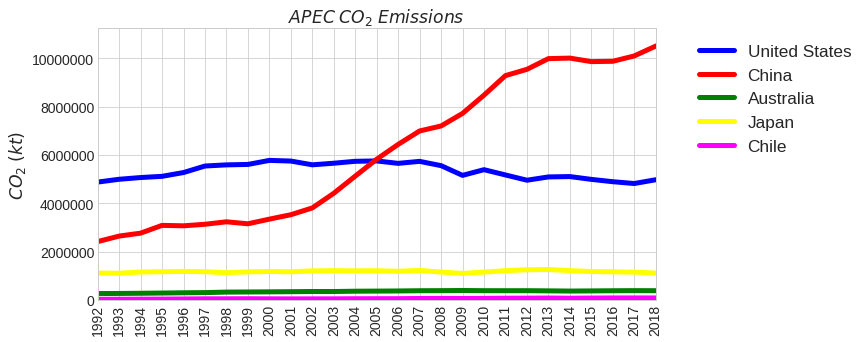

In [ ]:
#Multi-Line Chart
x = apec_co2['Year']
y1 = apec_co2['United States']
y2 = apec_co2['China']
y3 = apec_co2['Australia']
y4 = apec_co2['Japan']
y5 = apec_co2['Chile']
plt.figure(figsize=(10,5))
plt.plot(x,y1,color='blue',label='United States',linewidth=5)
plt.plot(x,y2,color='red',label='China',linewidth=5)
plt.plot(x,y3,color='green',label='Australia',linewidth=5)
plt.plot(x,y4,color='yellow',label='Japan',linewidth=5)
plt.plot(x,y5,color='magenta',label='Chile',linewidth=5)
plt.xlim(start,stop-4)
plt.ylim(0,None)
plt.xticks(range(start, stop-3),
           fontsize=14,
           rotation=90
           )
plt.yticks(fontsize=14)
# plt.xlabel("Year")
plt.ylabel('$CO_{2}\;(kt)$',
           fontsize='xx-large'
           )
plt.title("$APEC\;CO_{2}\; Emissions$",
          fontsize='xx-large'
          )
plt.legend(bbox_to_anchor=(1.05,1),
           loc='upper left',
           fontsize='xx-large'
           )
plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.savefig('apec_co2.png', dpi = 200, #dpi = dots per inch
            bbox_to_anchor=(1.05,1), 
            loc='upper left', 
            bbox_inches='tight'
          ) 
plt.show()

##BRICS

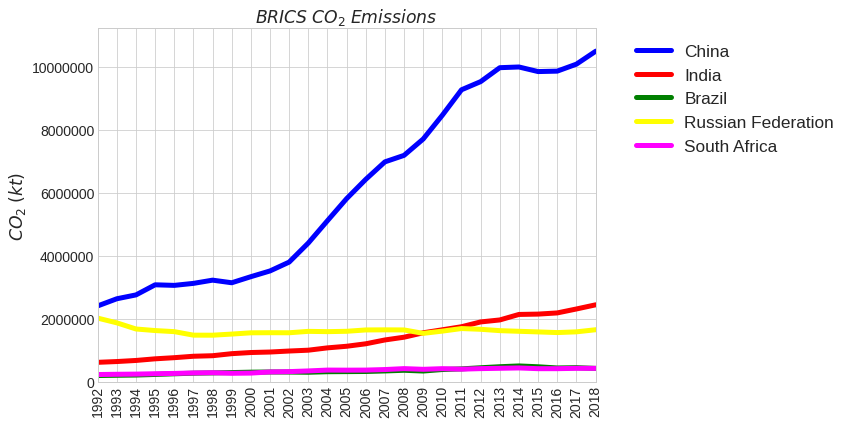

In [ ]:
#Multi-Line Chart
x = brics_co2['Year']
y1 = brics_co2['China']
y2 = brics_co2['India']
y3 = brics_co2['Brazil']
y4 = brics_co2['Russian Federation']
y5 = brics_co2['South Africa']
plt.figure(figsize=(12,6))
plt.plot(x,y1,color='blue',label='China',linewidth=5)
plt.plot(x,y2,color='red',label='India',linewidth=5)
plt.plot(x,y3,color='green',label='Brazil',linewidth=5)
plt.plot(x,y4,color='yellow',label='Russian Federation',linewidth=5)
plt.plot(x,y5,color='magenta',label='South Africa',linewidth=5)
plt.xlim(start,stop-4)
plt.ylim(0,None)
plt.xticks(range(start, stop-3),
           fontsize=14,
           rotation=90
           )
plt.yticks(fontsize=14)
# plt.xlabel("Year")
plt.ylabel('$CO_{2}\;(kt)$',
           fontsize='xx-large'
           )
plt.title("$BRICS\;CO_{2}\; Emissions$",
          fontsize='xx-large'
          )
plt.legend(bbox_to_anchor=(1.05,1),
           loc='upper left',
           fontsize='xx-large'
           )
plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.tight_layout()
plt.savefig('brics_co2.png', dpi = 200, #dpi = dots per inch
            bbox_to_anchor=(1.05,1), 
            loc='upper left', 
            bbox_inches='tight'
          ) 
plt.show()

#Tables

In [ ]:
ger = (eu_co2.iloc[26]['Germany'] / eu_co2['Germany'][df.index[0]])*100
fra = (eu_co2.iloc[26]['France'] / eu_co2['France'][df.index[0]])*100 
ita = (eu_co2.iloc[26]['Italy'] / eu_co2['Italy'][df.index[0]])*100
spa = (eu_co2.iloc[26]['Spain'] / eu_co2['Spain'][df.index[0]])*100
bel = (eu_co2.iloc[26]['Belgium'] / eu_co2['Belgium'][df.index[0]])*100
bra = (mercosul_co2.iloc[26]['Brazil'] / mercosul_co2['Brazil'][df.index[0]])*100
arg = (mercosul_co2.iloc[26]['Argentina'] / mercosul_co2['Argentina'][df.index[0]])*100
ven = (mercosul_co2.iloc[26]['Venezuela, RB'] / mercosul_co2['Venezuela, RB'][df.index[0]])*100
uru = (mercosul_co2.iloc[26]['Uruguay'] / mercosul_co2['Uruguay'][df.index[0]])*100
par = (mercosul_co2.iloc[26]['Paraguay']/ mercosul_co2['Paraguay'][df.index[0]])*100
usa = (nafta_co2.iloc[26]['United States'] / nafta_co2['United States'][df.index[0]])*100
can = (nafta_co2.iloc[26]['Canada'] / nafta_co2['Canada'][df.index[0]])*100
mex = (nafta_co2.iloc[26]['Mexico'] / nafta_co2['Mexico'][df.index[0]])*100
chi = (apec_co2.iloc[26]['China'] / apec_co2['China'][df.index[0]])*100
aus = (apec_co2.iloc[26]['Australia'] / apec_co2['Australia'][df.index[0]])*100
jap = (apec_co2.iloc[26]['Japan'] / apec_co2['Japan'][df.index[0]])*100
chile = (apec_co2.iloc[26]['Chile'] / apec_co2['Chile'][df.index[0]])*100
rus = (brics_co2.iloc[26]['Russian Federation'] / brics_co2['Russian Federation'][df.index[0]])*100
ind = (brics_co2.iloc[26]['India'] / brics_co2['India'][df.index[0]])*100
saf = (brics_co2.iloc[26]['South Africa'] / brics_co2['South Africa'][df.index[0]])*100
#Maximum emission
# increase_par = max(mercosul_co2['Paraguay']) / mercosul_co2['Paraguay'][df.index[0]]
# increase_par

In [ ]:
data = {'País':['Germany','France','Italy','Spain','Belgium','Brazil',
                   'Argentina','Venezuela, RB','Uruguay','Paraguay','United States',
                   'Canada','Mexico','China','Australia','Japan','Chile','Russian Federation',
                   'India','South Africa'], 
        'Emissões de CO2 em 2018 (kt)':[eu_co2.iloc[26]['Germany'],eu_co2.iloc[26]['France'],eu_co2.iloc[26]['Italy'],eu_co2.iloc[26]['Spain'],
                    eu_co2.iloc[26]['Belgium'],mercosul_co2.iloc[26]['Brazil'],mercosul_co2.iloc[26]['Argentina'],mercosul_co2.iloc[26]['Venezuela, RB'],
                    mercosul_co2.iloc[26]['Uruguay'],mercosul_co2.iloc[26]['Paraguay'],nafta_co2.iloc[26]['United States'],nafta_co2.iloc[26]['Canada'],
                    nafta_co2.iloc[26]['Mexico'],apec_co2.iloc[26]['China'],apec_co2.iloc[26]['Australia'],apec_co2.iloc[26]['Japan'],apec_co2.iloc[26]['Chile'],
                    brics_co2.iloc[26]['Russian Federation'],brics_co2.iloc[26]['India'],brics_co2.iloc[26]['South Africa']],
        'Comparativo 2018/1992 (%)':[ger,fra,ita,spa,bel,bra,arg,ven,uru,par,usa,can,mex,chi,aus,jap,chile,rus,ind,saf]}  
df = pd.DataFrame(data)
df.head(10)

,País,Emissões de CO2 em 2018 (kt),Comparativo 2018/1992 (%)
0,Germany,707700.012207,79.265699
1,France,307049.987793,83.303939
2,Italy,324880.004883,80.761679
3,Spain,257040.008545,110.616693
4,Belgium,93660.003662,83.379332
5,Brazil,433989.990234,208.779521
6,Argentina,176899.993896,163.902524
7,"Venezuela, RB",132130.004883,128.144705
8,Uruguay,6539.999962,137.106917
9,Paraguay,8470.000267,342.914991


In [ ]:
df_co2 = df.nlargest(10, 'Emissões de CO2 em 2018 (kt)')
df_co2.to_csv('./df_co2.csv')
df_co2.head(10)

,País,Emissões de CO2 em 2018 (kt),Comparativo 2018/1992 (%)
13,China,1.050293e+07,434.332005
10,United States,4.975310e+06,101.960806
18,India,2.451930e+06,391.500732
17,Russian Federation,1.661000e+06,81.790025
15,Japan,1.116150e+06,100.097755
0,Germany,7.077000e+05,79.265699
11,Canada,5.800900e+05,136.053200
12,Mexico,4.525700e+05,155.159767
19,South Africa,4.343500e+05,181.873380
5,Brazil,4.339900e+05,208.779521


In [ ]:
df_year = df.nlargest(10, 'Comparativo 2018/1992 (%)')
df_year.to_csv('./df_year.csv')
df_year.head(10)

,País,Emissões de CO2 em 2018 (kt),Comparativo 2018/1992 (%)
13,China,1.050293e+07,434.332005
18,India,2.451930e+06,391.500732
9,Paraguay,8.470000e+03,342.914991
16,Chile,8.661000e+04,285.653036
5,Brazil,4.339900e+05,208.779521
19,South Africa,4.343500e+05,181.873380
6,Argentina,1.769000e+05,163.902524
12,Mexico,4.525700e+05,155.159767
14,Australia,3.870700e+05,144.213863
8,Uruguay,6.540000e+03,137.106917
